<a href="https://colab.research.google.com/github/rahiakela/hands-on-machine-learning-with-scikit-learn-keras-and-tensorflow/blob/0-math-numpy-pandas-matplotlib-guide/math_linear_algebra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Algebra

Linear Algebra is the branch of mathematics that studies vector spaces and linear transformations between vector spaces, such as rotating a shape, scaling it up or down, translating it (ie. moving it), etc.

Machine Learning relies heavily on Linear Algebra, so it is essential to understand what vectors and matrices are, what operations you can perform with them, and how they can be useful.

## Setup

In [0]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

import numpy as np
import numpy.linalg as LA


%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Vectors

### Definition

A vector is a quantity defined by a magnitude and a direction. For example, a rocket's velocity is a 3-dimensional vector: its magnitude is the speed of the rocket, and its direction is (hopefully) up. A vector can be represented by an array of numbers called *scalars*. Each scalar corresponds to the magnitude of the vector with regards to each dimension.

For example, say the rocket is going up at a slight angle: it has a vertical speed of 5,000 m/s, and also a slight speed towards the East at 10 m/s, and a slight speed towards the North at 50 m/s. The rocket's velocity may be represented by the following vector:

**velocity** $= \begin{pmatrix}
10 \\
50 \\
5000 \\
\end{pmatrix}$

Note: by convention vectors are generally presented in the form of columns. Also, vector names are generally lowercase to distinguish them from matrices (which we will discuss below) and in bold (when possible) to distinguish them from simple scalar values such as ${meters\_per\_second} = 5026$.

A list of N numbers may also represent the coordinates of a point in an N-dimensional space, so it is quite frequent to represent vectors as simple points instead of arrows. A vector with 1 element may be represented as an arrow or a point on an axis, a vector with 2 elements is an arrow or a point on a plane, a vector with 3 elements is an arrow or point in space, and a vector with N elements is an arrow or a point in an N-dimensional space… which most people find hard to imagine.

Reference: https://www.mathsisfun.com/algebra/vectors.html

### Purpose

Vectors have many purposes in Machine Learning, most notably to represent observations and predictions. For example, say we built a Machine Learning system to classify videos into 3 categories (good, spam, clickbait) based on what we know about them. For each video, we would have a vector representing what we know about it, such as:

**video** $= \begin{pmatrix}
10.5 \\
5.2 \\
3.25 \\
7.0
\end{pmatrix}$

This vector could represent a video that lasts 10.5 minutes, but only 5.2% viewers watch for more than a minute, it gets 3.25 views per day on average, and it was flagged 7 times as spam. As you can see, each axis may have a different meaning.

Based on this vector our Machine Learning system may predict that there is an 80% probability that it is a spam video, 18% that it is clickbait, and 2% that it is a good video. This could be represented as the following vector:

**class_probabilities** $= \begin{pmatrix}
0.80 \\
0.18 \\
0.02
\end{pmatrix}$

### Vectors in python

In python, a vector can be represented in many ways, the simplest being a regular python list of numbers:

In [2]:
[10.5, 5.2, 3.25, 7.0]

[10.5, 5.2, 3.25, 7.0]

Since we plan to do quite a lot of scientific calculations, it is much better to use NumPy's ndarray, which provides a lot of convenient and optimized implementations of essential mathematical operations on vectors (for more details about NumPy, check out [the NumPy tutorial](https://github.com/ageron/handson-ml2/blob/master/tools_numpy.ipynb)). 

For example:

In [3]:
video = np.array([10.5, 5.2, 3.25, 7.0])
video

array([10.5 ,  5.2 ,  3.25,  7.  ])

The size of a vector can be obtained using the size attribute:

In [4]:
video.size

4

The shape of a vector can be obtained using the shape attribute:

In [5]:
video.shape

(4,)

The type of a vector can be obtained using the dtype attribute:

In [6]:
video.dtype

dtype('float64')

The $i^{th}$ element (also called *entry* or *item*) of a vector $\textbf{v}$ is noted $\textbf{v}_i$.

Note that indices in mathematics generally start at 1, but in programming they usually start at 0. So to access $\textbf{video}_3$ programmatically, we would write:

In [7]:
# 3rd element
video[2]

3.25

In [8]:
# 4th element
video[3]

7.0

### Plotting vectors

To plot vectors we will use matplotlib, so let's start by importing it (for details about matplotlib, check the [matplotlib tutorial](https://github.com/ageron/handson-ml2/blob/master/tools_matplotlib.ipynb)):

#### 2D vectors

Let's create a couple very simple 2D vectors to plot:

In [0]:
u = np.array([2, 5])  # x=2 & y=5
v = np.array([3, 1])  # x=3 & y=1

These vectors each have 2 elements, so they can easily be represented graphically on a 2D graph, for example as points:

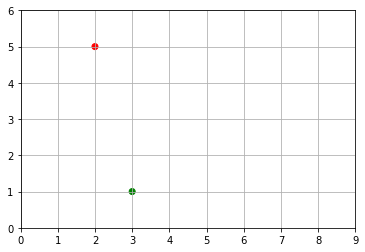

In [10]:
x_coords, y_coords = zip(u, v)

plt.scatter(x_coords, y_coords, color=['r', 'g'])
plt.axis([0, 9, 0, 6])
plt.grid()
plt.show()

Vectors can also be represented as arrows. Let's create a small convenience function to draw nice arrows:

In [0]:
def plot_vector2d(vector2d, origin=[0, 0], **options):
  return plt.arrow(origin[0], origin[1], vector2d[0], vector2d[1], 
                   head_width=0.2, head_length=0.3, length_includes_head=True, **options)

Now let's draw the vectors u and v as arrows:

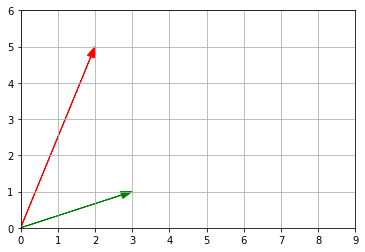

In [12]:
plot_vector2d(u, color='r')
plot_vector2d(v, color='g')
plt.axis([0, 9, 0, 6])
plt.grid()
plt.show()

#### 3D vectors

Plotting 3D vectors is also relatively straightforward. First let's create two 3D vectors:

In [0]:
a = np.array([1, 2, 8])
b = np.array([5, 6, 3])

Now let's plot them using matplotlib's Axes3D:

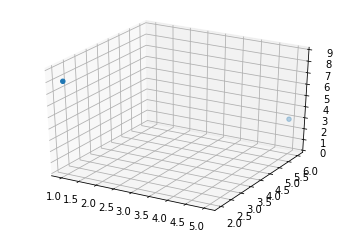

In [14]:
x_coords, y_coords, z_coords = zip(a, b)

subplot3d = plt.subplot(111, projection='3d')
subplot3d.scatter(x_coords, y_coords, z_coords)
subplot3d.set_zlim3d([0, 9])
plt.show()

It is a bit hard to visualize exactly where in space these two points are, so let's add vertical lines. 

We'll create a small convenience function to plot a list of 3d vectors with vertical lines attached:

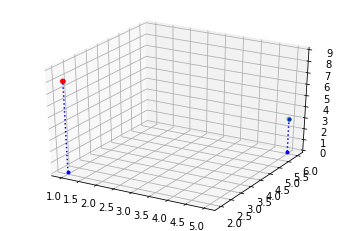

In [15]:
def plot_vectors3d(ax, vectors3d, z0, **options):
  for v in vectors3d:
    x, y, z = v
    ax.plot([x, x], [y, y], [z0, z], color='blue', linestyle='dotted', marker='.')
  x_coords, y_coords, z_coords = zip(*vectors3d)
  ax.scatter(x_coords, y_coords, z_coords, **options)

subplot3d = plt.subplot(111, projection='3d')
subplot3d.set_zlim([0, 9])
plot_vectors3d(subplot3d, [a, b], 0, color=('r', 'g'))
plt.show()

### Norm

The norm of a vector $\textbf{u}$, noted $\left \Vert \textbf{u} \right \|$, is a measure of the length (a.k.a. the magnitude) of $\textbf{u}$. There are multiple possible norms, but the most common one (and the only one we will discuss here) is the Euclidian norm, which is defined as:

$\left \Vert \textbf{u} \right \| = \sqrt{\sum_{i}{\textbf{u}_i}^2}$

We could implement this easily in pure python, recalling that $\sqrt x = x^{\frac{1}{2}}$

In [0]:
def vector_norm(vector):
  squares = [element ** 2 for element in vector]
  return sum(squares) ** 0.5

In [17]:
print(f'|| {u} || = {vector_norm(u)}')

|| [2 5] || = 5.385164807134504


In [0]:
def vector_norm(vector):
  squares = [element ** 2 for element in vector]
  return sum(squares) ** (1/2)

In [19]:
print(f'|| {u} || = {vector_norm(u)}')

|| [2 5] || = 5.385164807134504


However, it is much more efficient to use NumPy's norm function, available in the linalg (Linear Algebra) module:

In [20]:
import numpy.linalg as LA

LA.norm(u)

5.385164807134504

Let's plot a little diagram to confirm that the length of vector $\textbf{v}$ is indeed $\approx5.4$:

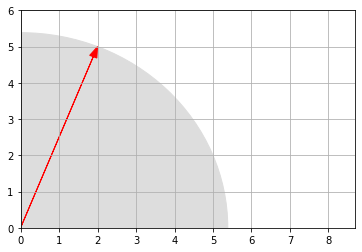

In [21]:
radius = LA.norm(u)

plt.gca().add_artist(plt.Circle((0, 0), radius, color='#DDDDDD'))
plot_vector2d(u, color='red')
plt.axis([0, 8.7, 0, 6])
plt.grid()
plt.show()

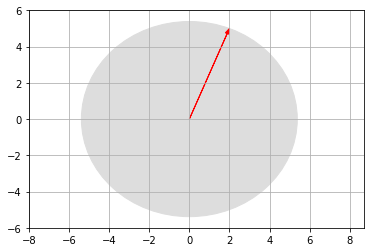

In [22]:
plt.gca().add_artist(plt.Circle((0, 0), radius, color='#DDDDDD'))
plot_vector2d(u, color='red')
plt.axis([-8, 8.7, -6, 6])
plt.grid()
plt.show()

Looks about right!

### Addition

Vectors of same size can be added together. Addition is performed elementwise:

In [23]:
print(' ', u)
print('+', v)
print('-'*10)
u + v

  [2 5]
+ [3 1]
----------


array([5, 6])

Let's look at what vector addition looks like graphically:

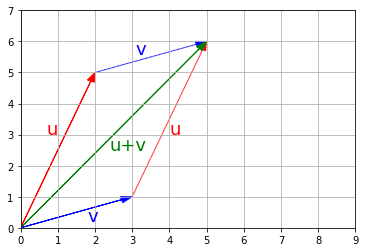

In [24]:
plot_vector2d(u, color='r')
plot_vector2d(v, color='b')

plot_vector2d(v, origin=u, color='b', linestyle='dotted')
plot_vector2d(u, origin=v, color='r', linestyle='dotted')

# plot addition
plot_vector2d(u + v, color='g')
plt.axis([0, 9, 0, 7])

# annotate text for u
plt.text(0.7, 3, 'u', color='r', fontsize=18)
plt.text(4, 3, 'u', color='r', fontsize=18)

# annotate text for v
plt.text(1.8, 0.2, 'v', color='b', fontsize=18)
plt.text(3.1, 5.6, 'v', color='b', fontsize=18)

# annotate text for u+v
plt.text(2.4, 2.5, 'u+v', color='g', fontsize=18)

plt.grid()
plt.show()

Vector addition is commutative, meaning that $\textbf{u} + \textbf{v} = \textbf{v} + \textbf{u}$. You can see it on the previous image: following $\textbf{u}$ then $\textbf{v}$ leads to the same point as following $\textbf{v}$ then $\textbf{u}$.

Vector addition is also associative, meaning that $\textbf{u} + (\textbf{v} + \textbf{w}) = (\textbf{u} + \textbf{v}) + \textbf{w}$.

If you have a shape defined by a number of points (vectors), and you add a vector $\textbf{v}$ to all of these points, then the whole shape gets shifted by $\textbf{v}$. This is called a [geometric translation](https://en.wikipedia.org/wiki/Translation_%28geometry%29):

In [25]:
v

array([3, 1])

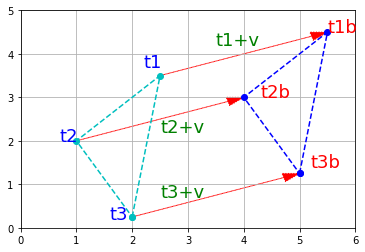

In [26]:
t1 = np.array([2, 0.25])
t2 = np.array([2.5, 3.5])
t3 = np.array([1, 2])

# combine all points 
x_coords, y_coords = zip(t1, t2, t3, t1)
plt.plot(x_coords, y_coords, 'c--', x_coords, y_coords, 'co')

# join all origin points with vector v
plot_vector2d(v, t1, color='r', linestyle=':')
plot_vector2d(v, t2, color='r', linestyle=':')
plot_vector2d(v, t3, color='r', linestyle=':')

# annotate all origin points
plt.text(2.2, 3.7, 't1', color='b', fontsize=18)
plt.text(0.7, 2, 't2', color='b', fontsize=18)
plt.text(1.6, 0.2, 't3', color='b', fontsize=18)

# add vector v to each t points
t1b = t1 + v
t2b = t2 + v
t3b = t3 + v

# join vector v to all resultant points
x_coords_b, y_coords_b = zip(t1b, t2b, t3b, t1b)
plt.plot(x_coords_b, y_coords_b, 'b--', x_coords_b, y_coords_b, 'bo')

# annotate vector addition
plt.text(3.5, 4.2, 't1+v', color='g', fontsize=18)
plt.text(2.5, 2.2, 't2+v', color='g', fontsize=18)
plt.text(2.5, 0.7, 't3+v', color='g', fontsize=18)

# annotate all origin points
plt.text(5.5, 4.5, 't1b', color='r', fontsize=18)
plt.text(4.3, 3, 't2b', color='r', fontsize=18)
plt.text(5.2, 1.4, 't3b', color='r', fontsize=18)

plt.axis([0, 6, 0, 5])
plt.grid()
plt.show()

Finally, substracting a vector is like adding the opposite vector.

### Multiplication by a scalar

Vectors can be multiplied by scalars. All elements in the vector are multiplied by that number, for example:

In [27]:
print('1.5 * ', u , '=')
1.5 * u

1.5 *  [2 5] =


array([3. , 7.5])

Graphically, scalar multiplication results in changing the scale of a figure, hence the name scalar. The distance from the origin (the point at coordinates equal to zero) is also multiplied by the scalar. For example, let's scale up by a factor of k = 2.5:

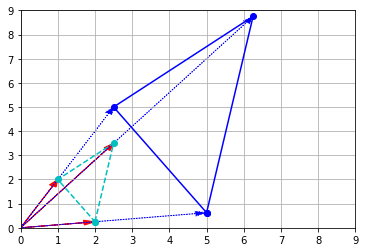

In [28]:
k = 2.5
t1c = k * t1
t2c = k * t2
t3c = k * t3

plt.plot(x_coords, y_coords, "c--", x_coords, y_coords, "co")

plot_vector2d(t1, color="r")
plot_vector2d(t2, color="r")
plot_vector2d(t3, color="r")

x_coords_c, y_coords_c = zip(t1c, t2c, t3c, t1c)
plt.plot(x_coords_c, y_coords_c, "b-", x_coords_c, y_coords_c, "bo")

plot_vector2d(k * t1, color="b", linestyle=":")
plot_vector2d(k * t2, color="b", linestyle=":")
plot_vector2d(k * t3, color="b", linestyle=":")

plt.axis([0, 9, 0, 9])
plt.grid()
plt.show()

As you might guess, dividing a vector by a scalar is equivalent to multiplying by its multiplicative inverse (reciprocal):

$\dfrac{\textbf{u}}{\lambda} = \dfrac{1}{\lambda} \times \textbf{u}$

Scalar multiplication is commutative: $\lambda \times \textbf{u} = \textbf{u} \times \lambda$.

It is also associative: $\lambda_1 \times (\lambda_2 \times \textbf{u}) = (\lambda_1 \times \lambda_2) \times \textbf{u}$.

Finally, it is distributive over addition of vectors: $\lambda \times (\textbf{u} + \textbf{v}) = \lambda \times \textbf{u} + \lambda \times \textbf{v}$.

### Zero, unit and normalized vectors

* A zero-vector is a vector full of 0s.
* A unit vector is a vector with a norm equal to 1.
* The normalized vector of a non-null vector $\textbf{u}$, noted $\hat{\textbf{u}}$, is the unit vector that points in the same direction as $\textbf{u}$. It is equal to: $\hat{\textbf{u}} = \dfrac{\textbf{u}}{\left \Vert \textbf{u} \right \|}$

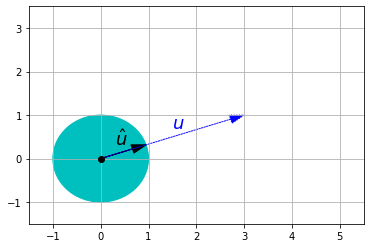

In [35]:
plt.gca().add_artist(plt.Circle((0, 0), 1, color='c'))
plt.plot(0, 0, 'ko')
plot_vector2d(v / LA.norm(v), color='k')
plot_vector2d(v, color='b', linestyle=':')
plt.text(0.3, 0.3, '$\hat{u}$', color='k', fontsize=18)
plt.text(1.5, 0.7, '$u$', color='b', fontsize=18)
plt.axis([-1.5, 5.5, -1.5, 3.5])
plt.grid()
plt.show()

### Dot product